import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from IPython.display import Image
import plotly
import plotly.graph_objs as go

In [93]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import Image
import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt

## Loading Raw Data

In [94]:
def rename_cols_and_save(xls_name):
    df = pd.read_excel("../../data/{0}.xls".format(xls_name), index_col=None, header=None)
    if xls_name == 'hprice1':
        names_dict = {0:'price', 
                     1:'assess', 
                     2:'bdrms',
                     3:'lotsize', 
                     4:'sqrft', 
                     5:'colonial',
                     6:'lprice', 
                     7:'lassess', 
                     8:'llotsize',
                     9:'lsqrft', 
                    }
    elif xls_name == 'saving':
         names_dict = {0:'sav', 
                     1:'inc', 
                     2:'size',
                     3:'edu', 
                     4:'age', 
                     5:'black',
                     6:'cons', 
                      }
    elif xls_name == '401k':    
        names_dict = {0:'prate', 
                     1:'mrate', 
                     2:'totpart',
                     3:'totelg', 
                     4:'age', 
                     5:'totemp',
                     6:'sole', 
                     7:'ltotemp', 
                      }
        
    elif xls_name == '401ksubs': 
        
         
             
        names_dict = {0:'e401k', 
                     1:'inc', 
                     2:'marr',
                     3:'male', 
                     4:'age', 
                     5:'fsize',
                     6:'nettfa', 
                     7:'p401k',
                     8:'pira',
                     9:'incsq', 
                     10:'agesq',
                      }
        
        
    df.rename(columns = names_dict, inplace = True)
    df.to_csv("../../data/{0}.csv".format(xls_name), index=False)
    
    #print data dictionary after file is loaded
    f = open('../../data/{0}.des'.format(xls_name), 'r')
    file_contents = f.read()
    print(file_contents)
    
    
    
    return df


In [95]:
df = rename_cols_and_save(xls_name='401ksubs')



401KSUBS.DES

e401k     inc       marr      male      age       fsize     nettfa    p401k    
pira      incsq     agesq     

  Obs:     9275

 1. e401k                        =1 if eligble for 401(k)
 2. inc                          annual income, $1000s
 3. marr                         =1 if married
 4. male                         =1 if male respondent
 5. age                          age^2
 6. fsize                        family size
 7. nettfa                       net total fin. assets, $1000
 8. p401k                        =1 if participate in 401(k)
 9. pira                         =1 if have IRA
10. incsq                        inc^2
11. agesq                        age^2



In [96]:
class EDA(object):
    
    def __init__(self, df, y):
        self.df = df
        self.y_string = y
        self.y = df[y]
        return None
    
    
    def inspect(self):
        inspect = {}
        inspect['head'] = self.df.head()
        inspect['describe'] = self.df.describe().T
        inspect['dtypes'] = self.df.dtypes
        return inspect
        
        return inspect 
    
    def _dist_plot(self, df, var):
        plt.figure()
        sns_plot = sns.distplot(df[var], color='b').get_figure()
        sns_plot.savefig("dist_plot_{0}.png".format(var))
        return sns_plot
    
    
    def variation(self):
        numerical = self.df.select_dtypes(include=np.number)
        for col in numerical.columns: 
            self._dist_plot(df=numerical, var=col)   
        return None
    
    
    def _scatter_matrix(self):
        numerical = self.df.select_dtypes(include=np.number)
        plt.figure()
        sns_plot = sns.pairplot(numerical)
        sns_plot.savefig("scatter_matrix_plot.png".format())
        return None
    
    def _box_plot(self, var_x):
        plt.figure()
        sns_plot = sns.boxplot(x=var_x, y=self.y, data=self.df).get_figure()
        sns_plot.savefig("box_plot_{0}_{1}.png".format(var_x, self.y_string))
        return None
    
    def _scatter_plot(self, var_x):
        sns_plot = sns.lmplot(x=var_x, y=self.y_string, data=self.df)
        sns_plot.savefig("correlation_{0}_{1}.png".format(var_x, self.y_string))
        return None
    
    def covariation(self):
        self._scatter_matrix()
        
        categorical = self.df.select_dtypes(include=['bool', 'category']) 
        for col in categorical.columns:
            self._box_plot(var_x = col)
         
        numerical = self.df.select_dtypes(include=np.number)
        for col in numerical.columns:
            self._scatter_plot(var_x=col)
        return None
    
    def run(self):
        self.variation()
        self.covariation()
        return None
    
    pass

In [97]:
my_eda = EDA(df, y='nettfa')

In [98]:
my_eda.inspect()['head']

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


In [99]:
my_eda.inspect()['describe']

,count,mean,std,min,25%,50%,75%,max
e401k,9275.0,0.392129,0.488252,0.0000,0.0000,0.000,1.0000,1.000
inc,9275.0,39.254641,24.090002,10.0080,21.6600,33.288,50.1600,199.041
marr,9275.0,0.628571,0.483213,0.0000,0.0000,1.000,1.0000,1.000
male,9275.0,0.204420,0.403299,0.0000,0.0000,0.000,0.0000,1.000
age,9275.0,41.080216,10.299517,25.0000,33.0000,40.000,48.0000,64.000
fsize,9275.0,2.885067,1.525835,1.0000,2.0000,3.000,4.0000,13.000
nettfa,9275.0,19.071675,63.963838,-502.3020,-0.5000,2.000,18.4495,1536.798
p401k,9275.0,0.276226,0.447154,0.0000,0.0000,0.000,1.0000,1.000
pira,9275.0,0.254340,0.435513,0.0000,0.0000,0.000,1.0000,1.000
incsq,9275.0,2121.192483,3001.469424,100.1601,469.1556,1108.091,2516.0255,39617.320


## Cleaning Dataset

In [100]:
def to_bool(df, list_of_vars):
    for var in list_of_vars:
        df[var] = df[var].astype('bool')
    return df

In [101]:
bool_vars = ['e401k', 'marr', 'male', 'p401k', 'pira']

In [102]:
df_clean = to_bool(df=df, list_of_vars=bool_vars)

In [103]:
df_clean.dtypes

e401k        bool
inc       float64
marr         bool
male         bool
age         int64
fsize       int64
nettfa    float64
p401k        bool
pira         bool
incsq     float64
agesq       int64
dtype: object

In [104]:
my_eda_clean = EDA(df, y='nettfa')

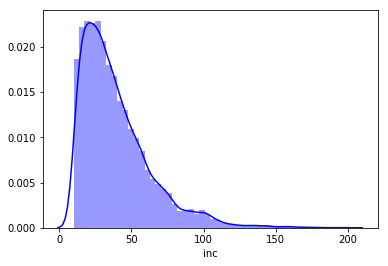

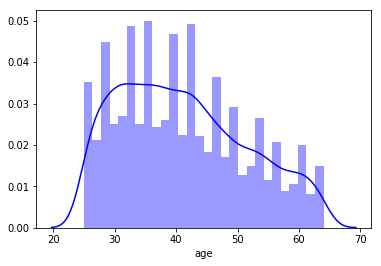

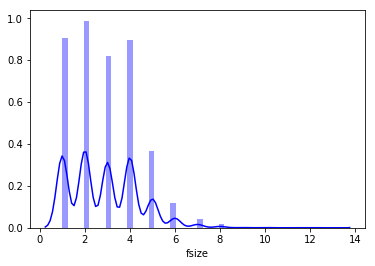

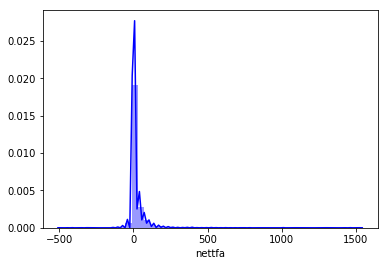

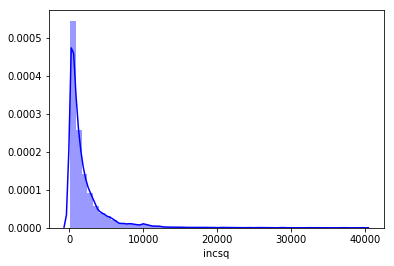

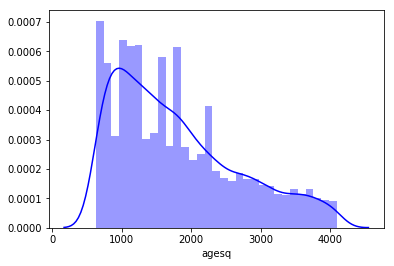

<Figure size 432x288 with 0 Axes>

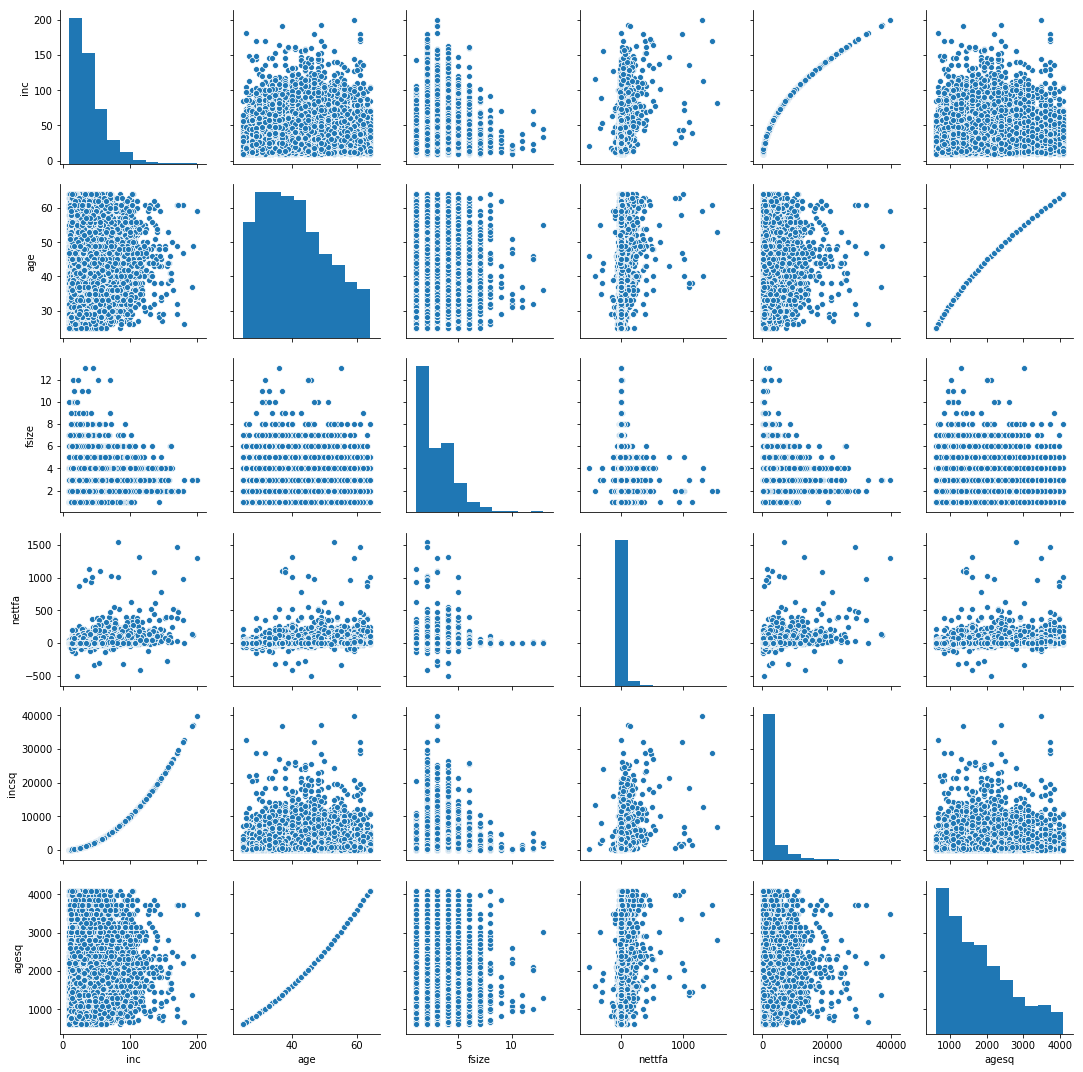

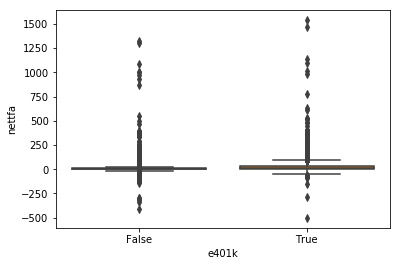

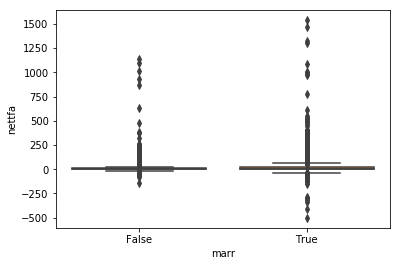

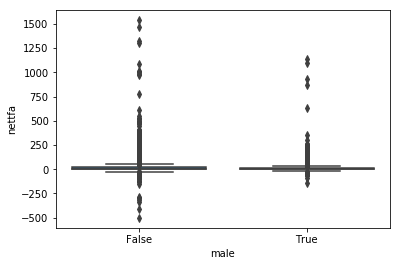

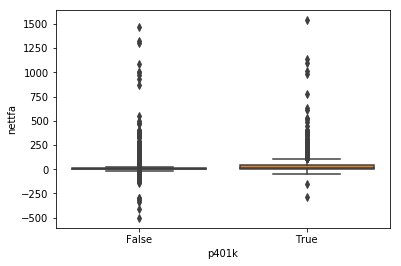

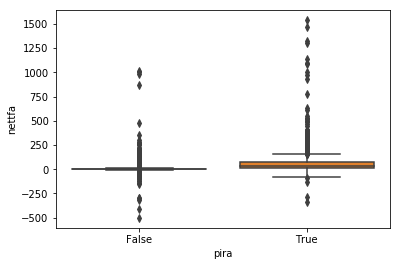

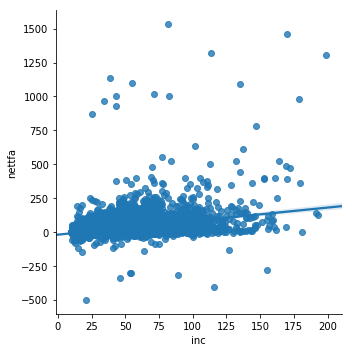

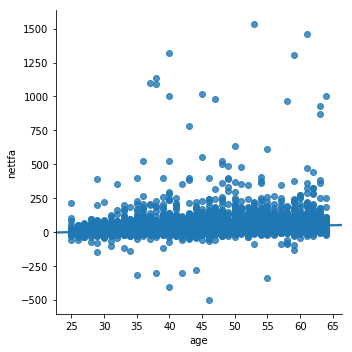

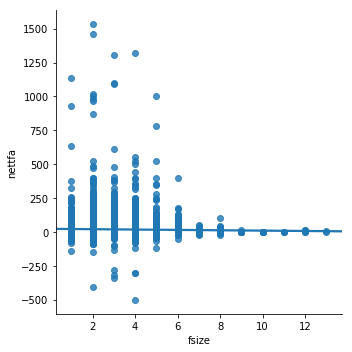

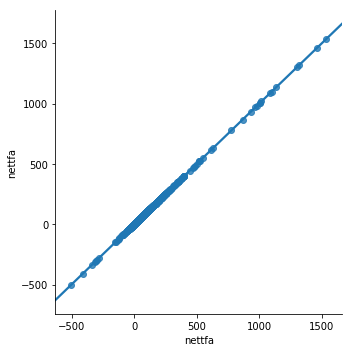

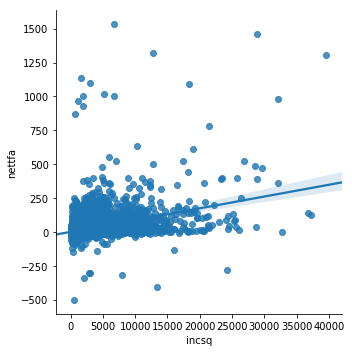

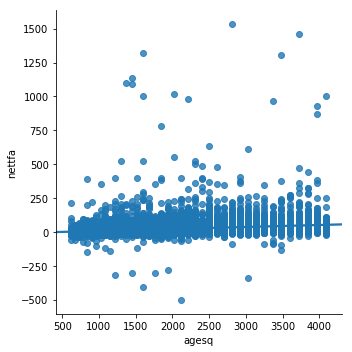

In [105]:
my_eda_clean.run()

## Initial Regression Models

In [106]:
def _regressions(formula, data):
    models = {}
    models['res_ols'] = smf.ols(formula='{0}'.format(formula), data=data).fit().summary()
    models['res_reg_ridge']  = smf.ols(formula=formula, data=df_clean).fit_regularized(method='elastic_net', alpha=0, L1_wt=1.0).params
    models['res_reg_lasso']  = smf.ols(formula=formula, data=df_clean).fit_regularized(method='elastic_net', alpha=1, L1_wt=1.0).params
    return models

def _final_regression(formula_final, data):
    final_model = smf.ols(formula='{0}'.format(formula_final), data=df_clean).fit().summary()
    return final_model


def run_regressions(formula, formula_final, data):
    all_models = {}
    all_models['candidate_models'] = _regressions(formula, data)
    all_models['final_model'] = _final_regression(formula_final, data)
    return all_models


formula = 'nettfa ~ inc + e401k + marr + male + age + fsize + p401k + pira + incsq + agesq'
formula_final = 'nettfa ~ inc + age + fsize + p401k + pira + incsq + agesq'

 
run_regressions(formula=formula, formula_final=formula_final, data=df_clean)


{'candidate_models': {'res_ols': <class 'statsmodels.iolib.summary.Summary'>
  """
                              OLS Regression Results                            
  Dep. Variable:                 nettfa   R-squared:                       0.248
  Model:                            OLS   Adj. R-squared:                  0.247
  Method:                 Least Squares   F-statistic:                     305.5
  Date:                Wed, 01 Apr 2020   Prob (F-statistic):               0.00
  Time:                        22:14:43   Log-Likelihood:                -50407.
  No. Observations:                9275   AIC:                         1.008e+05
  Df Residuals:                    9264   BIC:                         1.009e+05
  Df Model:                          10                                         
  Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
  ---------------------

In [107]:
class Regression(object):
    
    def __init__(self, df, formula, formula_final):
        self.df = df
        self.formula = formula
        self.formula_final = formula_final
        return None
    
    def _regressions(self, formula, data):
        models = {}
        models['res_ols'] = smf.ols(formula=formula, data=data).fit().summary()
        models['res_reg_ridge']  = smf.ols(formula=formula, data=data).fit_regularized(method='elastic_net', alpha=0, L1_wt=1.0).params
        models['res_reg_lasso']  = smf.ols(formula=formula, data=data).fit_regularized(method='elastic_net', alpha=1, L1_wt=1.0).params
        return models

    def _final_regression(self, formula_final, data):
        final_model = smf.ols(formula=formula_final, data=data).fit().summary()
        return final_model
    
    def run(self):
        all_models = {}
        all_models['candidate_models'] = _regressions(formula=self.formula, data=self.df)
        all_models['final_model'] = _final_regression(formula_final=self.formula_final, data=self.df)
        return all_models
    pass


In [108]:
my_regression = Regression(df = df_clean, 
                           formula = 'nettfa ~ inc + e401k + marr + male + age + fsize + p401k + pira + incsq + agesq', 
                           formula_final = 'nettfa ~ inc + age + fsize + p401k + pira + incsq + agesq')

my_regression.run()

{'candidate_models': {'res_ols': <class 'statsmodels.iolib.summary.Summary'>
  """
                              OLS Regression Results                            
  Dep. Variable:                 nettfa   R-squared:                       0.248
  Model:                            OLS   Adj. R-squared:                  0.247
  Method:                 Least Squares   F-statistic:                     305.5
  Date:                Wed, 01 Apr 2020   Prob (F-statistic):               0.00
  Time:                        22:14:43   Log-Likelihood:                -50407.
  No. Observations:                9275   AIC:                         1.008e+05
  Df Residuals:                    9264   BIC:                         1.009e+05
  Df Model:                          10                                         
  Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
  ---------------------

## Candidate Model

In [113]:
candidate = smf.ols(formula='nettfa ~ inc + age + fsize + p401k + pira + incsq + agesq', data=df_clean).fit()
candidate.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 nettfa   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     435.4
Date:                Wed, 01 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:15:46   Log-Likelihood:                -50410.
No. Observations:                9275   AIC:                         1.008e+05
Df Residuals:                    9267   BIC:                         1.009e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        26.6004      9.701      2.742      0.006       7.584      45.617
p401k[T.True]    14.2605      1.350     10.567      0.000      11.615      16.906
pira[T.True]     31.4170      1.467     21.423      0.000      28.542      34.292
inc              -0.5669      0.073     -7.722      0.000      -0.711      -0.423
age              -1.6168      0.477     -3.388      0.001      -2.552      -0.681
fsize            -1.1438      0.390     -2.930      0.003      -1.909      -0.379
incsq             0.0109      0.001     19.179      0.000       0.010       0.012
agesq             0.0275      0.005      5.014      0.000       0.017       0.038
==============================================================================
Omnibus:                    15071.770   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         16359646.641
Skew:                          10.549   Prob(JB):                         0.00
Kurtosis:                     207.663   Cond. No.                     6.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Diagnostics

## Final Model